
<style>
    body {
        background-color: #f4f4f4 !important;
        font-family: "Segoe UI", "Verdana", sans-serif !important;
        color: #2b2b2b !important;
    }
    h1, h2, h3 {
        color: #1a3e5f !important;
        border-bottom: 2px solid #ccc;
        padding-bottom: 4px;
    }
</style>


# ANALISI SUI POKEMON TRA STASTICHE E POTENZE

## Nicolas Natale

# INTRODUZIONE

##  Perché ho scelto i Pokémon

- È un universo che conosco bene e che mi appassiona
- Il dataset è ben strutturato e chiaro da analizzare
- Volevo esplorare questo universo da una prospettiva diversa

## Domande di partenza

- Come è cambiata la distribuzione dell’attacco e attacco speciale tra i vari tipi?
- Le statistiche medie dei Pokémon sono aumentate nelle nuove generazioni?
- Chi sono i 10 Pokémon con più vittorie e quelli con più sconfitte?
- Le statistiche come sono distribuite?

# Descrizione Dati

### Quale/i dataset è/sono stati analizzati?
#### Sono stati usati due dataset
### Che dati contengno contiene/contengono?
#### IL primo dataset contiene dati generali sui pokemon:
* nome
* Statistiche (HP, Atk, Def. Spec. ATk, Spec.Def. Spe)
* Il secondo dataset simula battaglie tra Pokémon, indicando per ciascuna il vincitore
### Eventualmente, che dati interessanti invece non sono presenti?
#### Questo dataset non contiene tutte le generazioni e non contiene le abilità dei pokemon


### Chi ha creato il dataset?
##### Jonathan Bouchet
### Quando è stato creato il dataset?
#### 2017-10-01
### È disponibile online?
#### https://www.kaggle.com/code/jonathanbouchet/pokemon-battles/report


# ANALISI

## Quanto è cambiato la distribuzione di attacco ed attacco Speciale nei vari Tipi?

### Confronto tra Attack e Sp. Atk

Alcuni tipi di Pokémon, come **Roccia**, **Terra**, **Lotta**, mostrano una netta preferenza per l'Attacco Speciale.

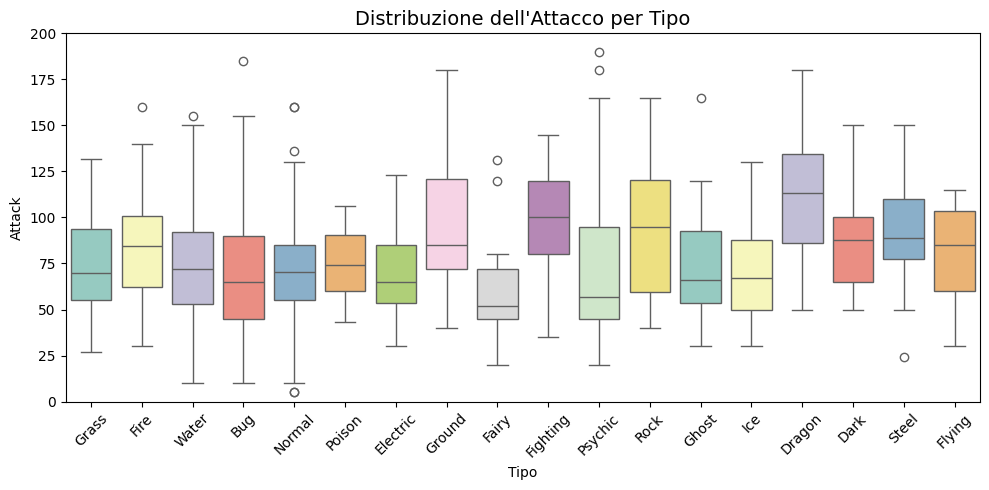

In [2]:
## Quanto è cambiato la distribuzione di attacco nei vari tipi?

##plt.figure(figsize(14, 5)) sbagliato 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Markdown, display

df_pokemon = pd.read_csv("pokemon.csv")
combats_df = pd.read_csv("combats.csv")


plt.figure(figsize=(10, 5))

sns.boxplot(x = "Type 1", y = 'Attack', hue= "Type 1", data=df_pokemon, palette="Set3", dodge=False, )
plt.title("Distribuzione dell'Attacco per Tipo", fontsize = 14)
plt.xlabel("Tipo")
plt.ylabel("Attack")
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 200)

display(Markdown("### Confronto tra Attack e Sp. Atk\n\nAlcuni tipi di Pokémon, come **Roccia**, **Terra**, **Lotta**, mostrano una netta preferenza per l'Attacco Speciale."))

### Confronto tra Attack e Sp. Atk

Alcuni tipi di Pokémon, come **Drago**, **Elettro**, **Psico**, mostrano una netta preferenza per l'Attacco Speciale.

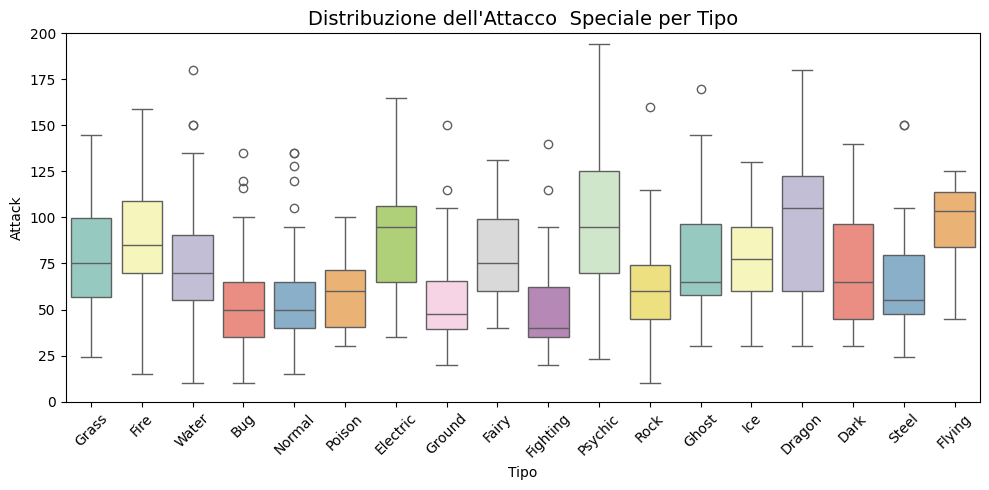

In [3]:
plt.figure(figsize=(10, 5))

sns.boxplot(x = "Type 1", y = 'Sp. Atk', hue= "Type 1", data=df_pokemon, palette="Set3", dodge=False)
plt.title("Distribuzione dell'Attacco  Speciale per Tipo", fontsize = 14)
plt.xlabel("Tipo")
plt.ylabel("Attack")
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 200)

display(Markdown("### Confronto tra Attack e Sp. Atk\n\nAlcuni tipi di Pokémon, come **Drago**, **Elettro**, **Psico**, mostrano una netta preferenza per l'Attacco Speciale."))

## Le statistiche medie dei Pokemon è cambiata nelle nuove generazioni?

### confronto tra le varie generazioni 

 Le statistiche medie cambiano poco tra generazioni, con un leggero aumento di HP e Sp. Def.

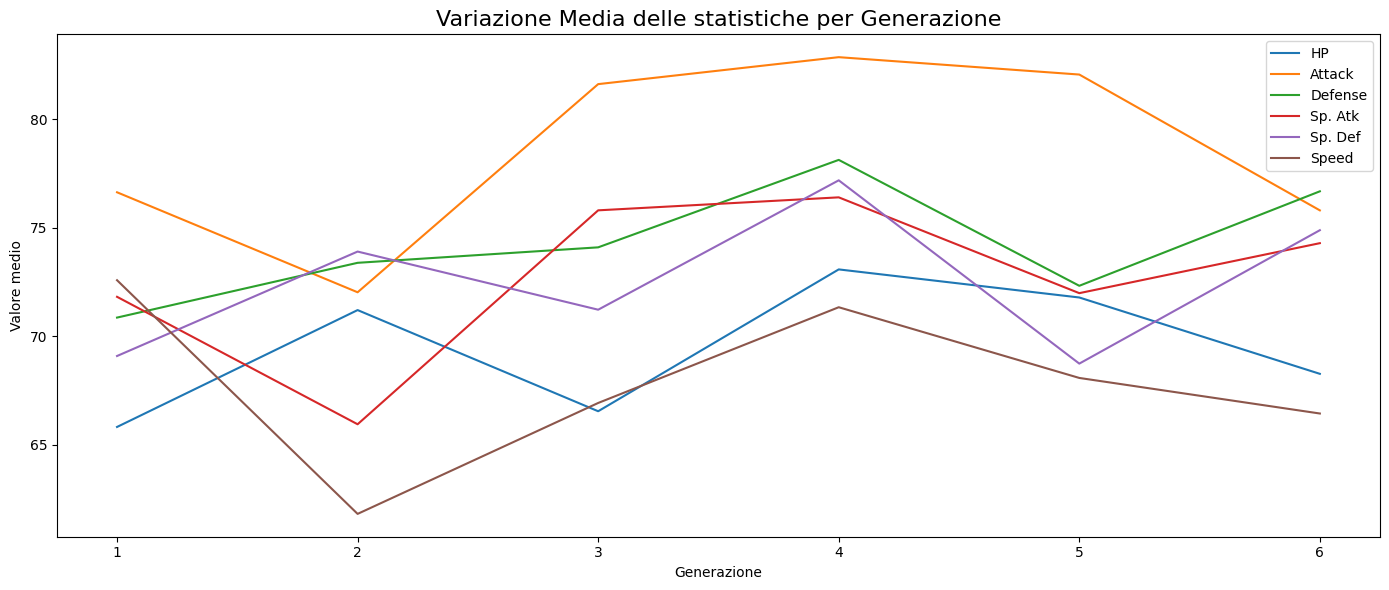

In [5]:
##Le statistiche medie dei Pokemon è cambiata ovvero i pokemon delle nuove generazioni dalle vecchie generazioni

##plt.figure(figsize(14, 5))
plt.figure(figsize=(14, 6))
stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
media_generazione = df_pokemon.groupby('Generation')[stats].mean().reset_index()


for stat in stats:
    sns.lineplot(x="Generation", y=stat, data=media_generazione, label=stat)
plt.title("Variazione Media delle statistiche per Generazione", fontsize = 16)
plt.xlabel("Generazione")
plt.ylabel("Valore medio")
plt.tight_layout()

display(Markdown("### confronto tra le varie generazioni \n\n Le statistiche medie cambiano poco tra generazioni, con un leggero aumento di HP e Sp. Def."))

## Chi sono i 10 pokemon più deboli e  invece chi sono i pokemon più forti?

### Pokemon con più vittore 

I Pokémon con più vittorie sono in gran parte starter o leggendari.

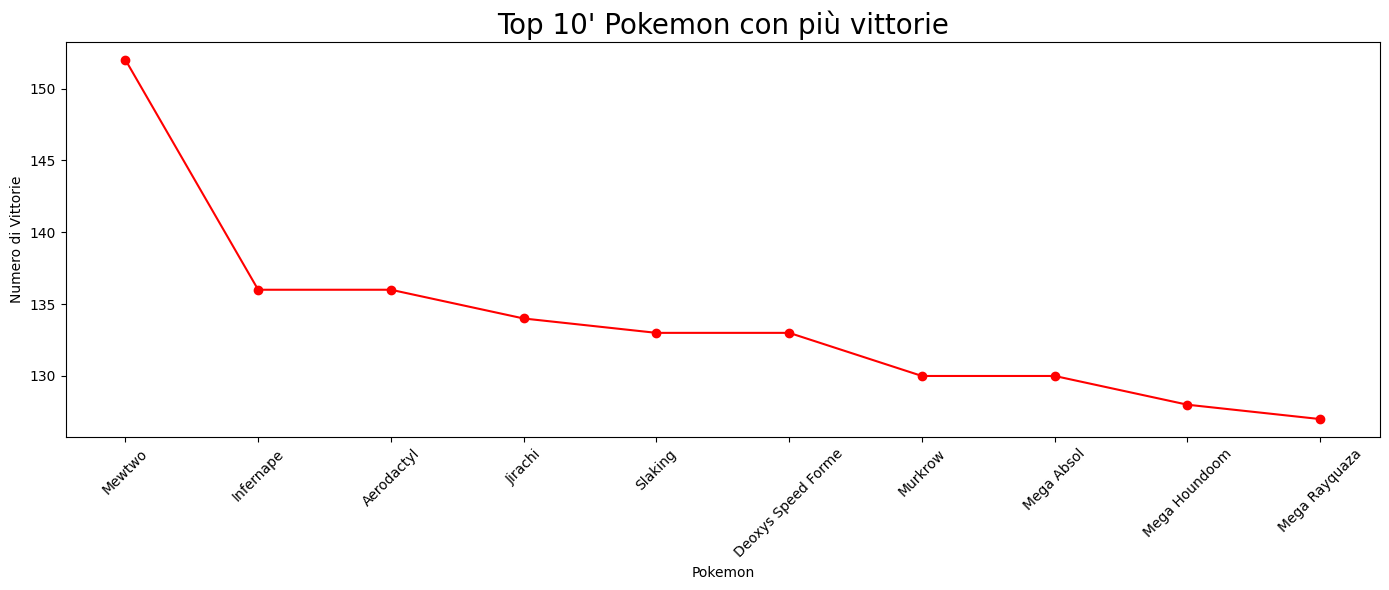

In [14]:

## Chi sono i 10 pokemon più deboli e chi sono i pokemon invece più forti?
plt.figure(figsize=(14, 6))

vincitori = combats_df["Winner"].value_counts().head(10)
vincitori_df = vincitori.reset_index()
vincitori_df.columns = ['Pokemon_ID', 'Victories']

nomi_vincitori = pd.merge(vincitori_df, df_pokemon[['#', 'Name']], 
                             left_on='Pokemon_ID', right_on='#')
nomi_vincitori  = nomi_vincitori[['Name', 'Victories']]

plt.plot(nomi_vincitori['Name'], nomi_vincitori['Victories'],
                                 marker='o', color='red')
plt.title("Top 10' Pokemon con più vittorie", fontsize = 20)
plt.xlabel("Pokemon")
plt.ylabel("Numero di Vittorie")
plt.xticks(rotation=45)
plt.tight_layout()

display(Markdown("### Pokemon con più vittore \n\nI Pokémon con più vittorie sono in gran parte starter o leggendari."))

### Pokemon con meno vittorie 

Alcuni Pokémon tendono a perdere frequentemente, probabilmente per debolezza o alta frequenza d’uso in match sfavorevoli

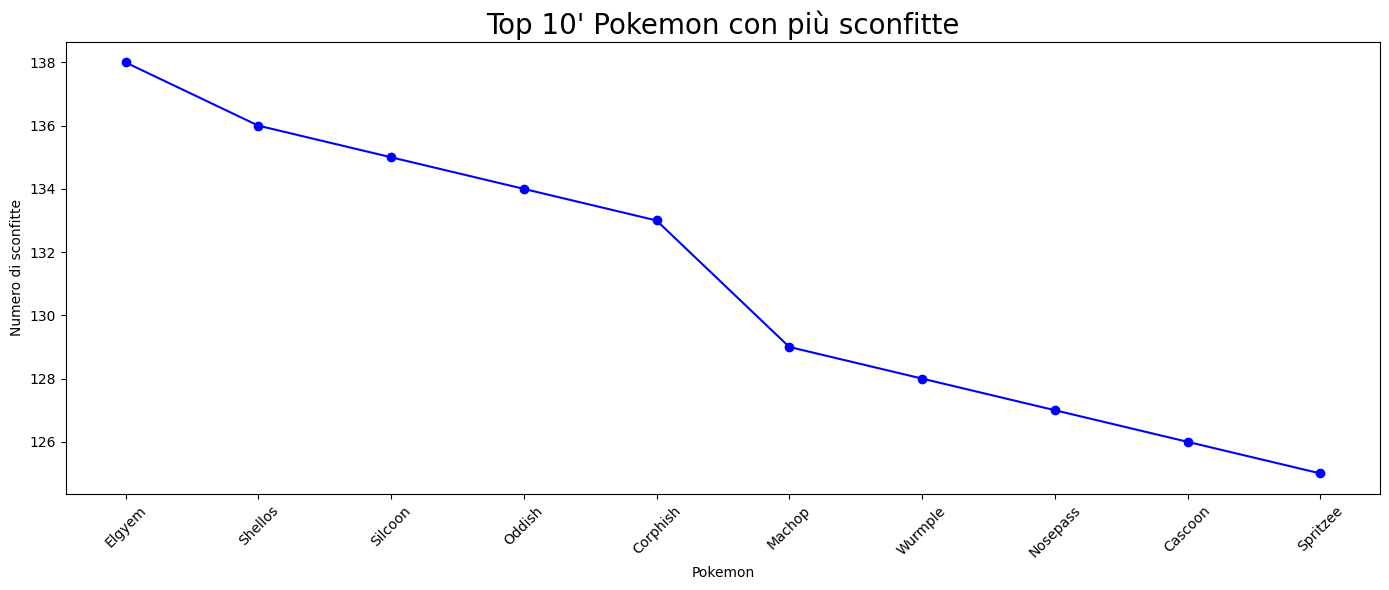

In [16]:
vincitori = combats_df["Winner"].value_counts()
sfide = pd.concat([combats_df['First_pokemon'], combats_df['Second_pokemon']])
ct_sfide = sfide.value_counts()

perdenti = (ct_sfide - vincitori).sort_values(ascending=False).head(10)
perdenti_df = perdenti.reset_index()
perdenti_df.columns = ['Pokemon_ID', 'Losses']

nomi_perdenti = pd.merge(perdenti_df, df_pokemon[['#', 'Name']],  
                         left_on='Pokemon_ID', right_on='#')
nomi_perdenti  = nomi_perdenti[['Name', 'Losses']]


plt.figure(figsize=(14, 6))

plt.plot(nomi_perdenti['Name'], nomi_perdenti['Losses'], 
                                marker='o', color='blue')
plt.title("Top 10' Pokemon con più sconfitte", fontsize =20)
plt.xlabel("Pokemon")
plt.ylabel("Numero di sconfitte")
plt.xticks(rotation=45)
plt.tight_layout()
display(Markdown("### Pokemon con meno vittorie \n\nAlcuni Pokémon tendono a perdere frequentemente, probabilmente per debolezza o alta frequenza d’uso in match sfavorevoli"))


## Le stastiche medie dei pokemon, come sono distribuite?

###  Distribuzione statitistiche ai Poekmon 

 La maggior parte dei Pokémon ha statistiche totali comprese tra 400 e 600.

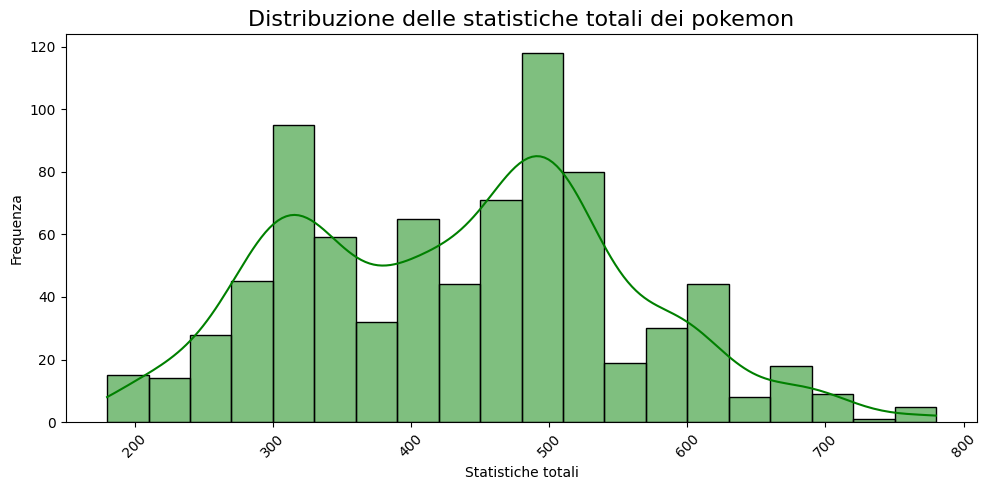

In [12]:
df_pokemon['Total'] = df_pokemon[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)
plt.figure(figsize=(10, 5))
sns.histplot(df_pokemon['Total'], bins=20, kde=True, color='green')
plt.title("Distribuzione delle statistiche totali dei pokemon", fontsize = 16)
plt.xlabel("Statistiche totali")
plt.ylabel("Frequenza")
plt.xticks(rotation=45)
plt.tight_layout()
display(Markdown("###  Distribuzione statitistiche ai Poekmon \n\n La maggior parte dei Pokémon ha statistiche totali comprese tra 400 e 600."))

# Conclusioni

- La distribuzione dell’attacco varia poco tra generazioni, ma si notano differenze marcate tra i tipi.
- Le statistiche medie dei Pokémon si mantengono stabili nel tempo, con incrementi lievi in hp e sp. Def
- I Pokémon con più vittorie non coincidono sempre con quelli dalle statistiche più alte, ma sono quelli più frequentemente coinvolti nei combattimenti anceh se ci sono delle eccezioni.
- I Pokémon con più sconfitte tendono ad avere statistiche più basse, ma anche una presenza maggiore nei match.

 Queste osservazioni derivano direttamente dall’analisi dei dataset `pokemon.csv` e `combats.csv`.
